In [1]:
import numpy as np
import os

def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.target = mnist.target.astype(np.int8)
sort_by_target(mnist) # fetch_openml() returns an unsorted dataset

mnist["data"],mnist["target"]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int8))

In [3]:
X, y = mnist["data"], mnist["target"]
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

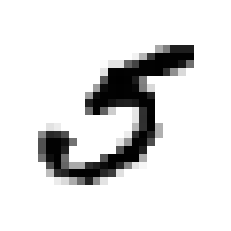

5

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
 interpolation="nearest")
plt.axis("off")
plt.show()

y[36000]


In [5]:
from sklearn.linear_model import SGDClassifier
#y_train_5 = (y_train == 5) # True for all 5s, False for all other digits.
#y_test_5 = (y_test == 5)
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([5], dtype=int8)

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score


In [7]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores 


array([[ -4759.96998459, -29760.98627412,  -9076.25129589,
         -5202.6903913 , -11248.53587698,   3509.16747572,
        -26731.35443102, -11363.06161497, -16790.00294632,
        -26044.08475729]])

In [8]:
sgd_clf.classes_ #, sgd_clf.classes[5] 

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [9]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")


array([0.8855, 0.8735, 0.8644])

In [10]:
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
#y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx


array([[5748,    1,   28,    9,   13,   21,   31,    3,   53,   16],
       [   3, 6443,   45,   29,   11,   38,   11,   18,  119,   25],
       [  54,   85, 5209,  118,   62,   36,  136,   75,  142,   41],
       [  48,   33,  241, 5132,   18,  239,   36,   59,  171,  154],
       [  28,   23,   50,   27, 5019,   20,   79,   43,  110,  443],
       [ 104,   32,   59,  236,  110, 4367,  122,   31,  265,   95],
       [  77,   21,  122,    4,   70,  118, 5425,    1,   76,    4],
       [  30,   27,   67,   33,   86,   18,   12, 5485,   48,  459],
       [  58,  188,  121,  195,   56,  289,   62,   24, 4567,  291],
       [  41,   23,   28,   58,  272,   51,    4,  251,  148, 5073]],
      dtype=int64)

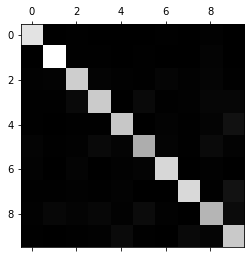

In [11]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

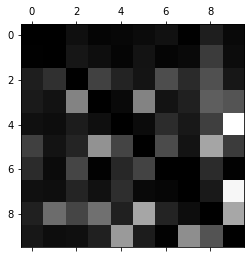

In [12]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()


In [13]:
#testscore  = cross_val_score(sgd_clf, X_test, y_test, cv=3, scoring="accuracy")
#testscore

array([0.82993401, 0.87638764, 0.87848785])

In [14]:
#y_test_pred = cross_val_predict(sgd_clf, X_test, y_test, cv=3)
#test_conf_mx = confusion_matrix(y_test, y_test_pred)
#test_conf_mx


array([[ 925,    0,    6,    9,    6,    8,    9,    1,   12,    4],
       [   0, 1073,    5,    7,    1,    4,    5,    4,   34,    2],
       [   9,    6,  859,   34,   20,    8,   20,   24,   47,    5],
       [   1,    0,   21,  892,    0,   32,    2,   12,   34,   16],
       [   1,    3,   14,    4,  851,    1,   12,   17,   31,   48],
       [  10,    5,   16,   60,   15,  656,   26,   14,   69,   21],
       [  11,    2,   12,    6,    7,   16,  887,    7,    9,    1],
       [   5,   10,   20,    7,    9,    2,    1,  930,   10,   34],
       [   7,   10,   22,   60,   13,   48,    5,   19,  770,   20],
       [   5,    4,    9,   22,   51,   19,    1,   75,   50,  773]],
      dtype=int64)

In [15]:
from scipy.ndimage.interpolation import shift
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])


# Creating Augmented Dataset
X_train_augmented = [image for image in X_train]
y_train_augmented = [image for image in y_train]

for dx, dy in ((1,0), (-1,0), (0,1), (0,-1)):
     for image, label in zip(X_train, y_train):
             X_train_augmented.append(shift_image(image, dx, dy))
             y_train_augmented.append(label)

In [16]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = np.array(X_train_augmented)[shuffle_idx]
y_train_augmented = np.array(y_train_augmented)[shuffle_idx]

In [17]:
sgd_clf.fit(X_train_augmented, y_train_augmented)
sgd_clf.predict([some_digit])
cross_val_score(sgd_clf, X_train_augmented, y_train_augmented, cv=3, scoring="accuracy")


array([0.84342, 0.82328, 0.82364])

In [18]:
scaler = StandardScaler()
#X_train_augmented_scaled = scaler.fit_transform(X_train_augmented.astype(np.float64))
y_train_augmented_pred = cross_val_predict(sgd_clf, X_train_augmented, y_train_augmented, cv=3)
conf_mx_aug = confusion_matrix(y_train_augmented, y_train_augmented_pred)
conf_mx_aug

array([[26704,    11,   473,   352,    54,   833,   398,    48,   571,
          171],
       [   51, 31398,   448,   117,   123,   512,    70,    43,   902,
           46],
       [  188,   502, 24645,   828,   324,   478,  1121,   325,  1207,
          172],
       [  102,   272,  1300, 23201,   106,  3163,   219,   234,  1517,
          541],
       [   70,   348,   465,   182, 24346,   387,   693,   106,   758,
         1855],
       [  398,   120,   455,  1048,   411, 22070,   974,    64,  1107,
          458],
       [  232,   209,  1118,    62,   130,   701, 26561,    16,   538,
           23],
       [  183,   343,   832,   675,   561,  1519,    44, 24199,   422,
         2547],
       [  190,   823,  1316,   878,   213,  2074,   475,   112, 22576,
          598],
       [  135,   429,   285,   626,  1423,  1452,    57,   762,  1242,
        23334]], dtype=int64)

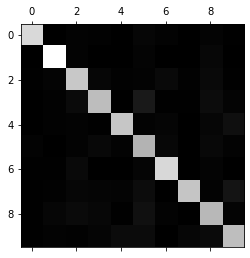

In [19]:
plt.matshow(conf_mx_aug, cmap=plt.cm.gray)
plt.show()

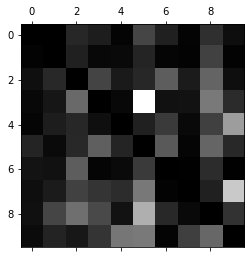

In [20]:
row_sums_aug = conf_mx_aug.sum(axis=1, keepdims=True)
norm_conf_mx_aug = conf_mx_aug / row_sums_aug
np.fill_diagonal(norm_conf_mx_aug, 0)
plt.matshow(norm_conf_mx_aug, cmap=plt.cm.gray)
plt.show()